# InSituPy demonstration - Differential gene expression analysis

## Plan for publication

1. Use Katja's descriptions/annotations to specify the identity of the 5 subtypes: plot the cell composition within each annotation (stroma enriched DCIS vs normal DCIS vs intermediate DCIS vs. invasive)
2. Differential gene expression analysis between DCIS and invasive (for this the comparison of two different cell types needs to be implemented)
3. Fragestellung von Katja beantworten: Ist Subtyp 2 immer außenliegend/buddend? Könnte interessantes Ergebnis sein, das so nicht bei Janesick beschrieben war.
4. Analyze regions to show the stromal enrichment of Region 2, 3 and 4 compared to Region 1 which is non-stroma-enriched DCIS (which can be also seen in transcriptome)

In [1]:
## The following code ensures that all functions and init files are reloaded before executions.
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from insitupy import InSituData, CACHE
from insitupy.plotting import plot_cellular_composition

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load Xenium data into `InSituData` object

Now the Xenium data can be parsed by providing the data path to the `InSituPy` project folder.

In [4]:
insitupy_project = Path(CACHE / "out/demo_insitupy_project")

In [5]:
xd = InSituData.read(insitupy_project)

In [6]:
xd.load_all()

In [7]:
xd.import_annotations(
    files=r"C:\Users\ge37voy\Github\InSituPy\notebooks\demo_annotations\breast_cancer_annotations_publ.geojson",
    keys="Janesick",
    scale_factor=0.2125
)

In [8]:
xd.import_annotations(
    files=r"C:\Users\ge37voy\Github\InSituPy\notebooks\demo_annotations\breast_cancer_annotations_Katja.geojson",
    keys="Katja",
    scale_factor=0.2125
)

In [9]:
xd.import_regions(
    files=r"C:\Users\ge37voy\Github\InSituPy\notebooks\demo_annotations\breast_cancer_regions_Katja.geojson",
    keys="Katja",
    scale_factor=0.2125
)

In [10]:
xd

InSituData
Method:		Xenium
Slide ID:	0001879
Sample ID:	Replicate 1
Path:		C:\Users\ge37voy\.cache\InSituPy\out\demo_insitupy_project
Metadata file:	.ispy
    ➤ images
       nuclei:	(25778, 35416)
       CD20:	(25778, 35416)
       HER2:	(25778, 35416)
       HE:	(25778, 35416, 3)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 156447 × 297
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes_by_counts', 'n_genes', 'leiden', 'cell_type_dc', 'cell_type_tacco', 'cell_type_dc_sub', 'cell_type_publ'
           var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
           uns: 'cell_type_dc_colors', 'cell_type_dc_sub', 'cell_type_dc_sub_colors', 'cell_type_publ_colors', 'cell_type_tacco_colors', 'counts_location', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
           obsm: 'OT',

In [11]:
xd.show()

Saving figure to file figures/cell_composition_barh_annotations_Katja.pdf
Saved.


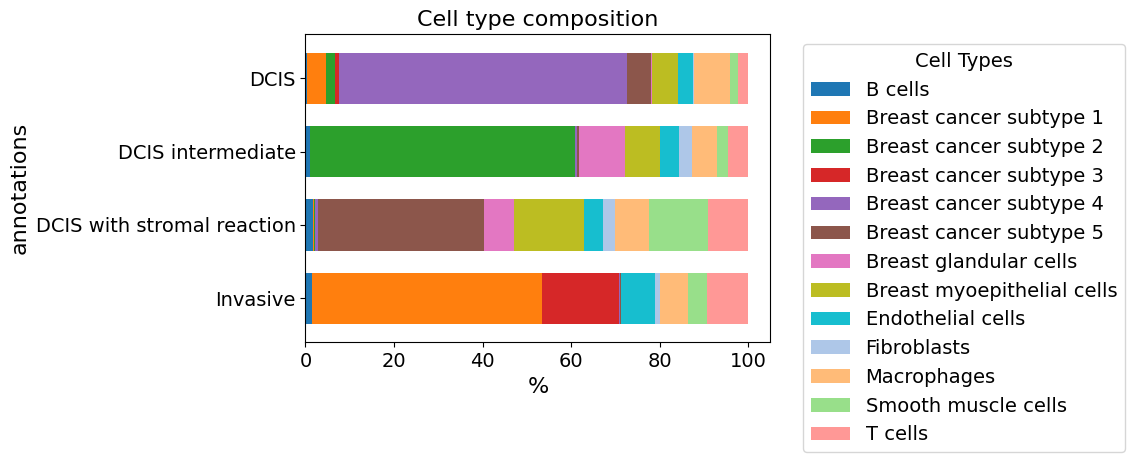

<Figure size 640x480 with 0 Axes>

In [11]:
plot_cellular_composition(
    data=xd, cell_type_col="cell_type_dc_sub",
    key="Katja", modality="annotations", #max_cols=3,
    show_labels=True, plot_type="barh",
    savepath="figures/cell_composition_barh_annotations_Katja.pdf"
)

Saving figure to file figures/cell_composition_barh_regions_Katja.pdf
Saved.


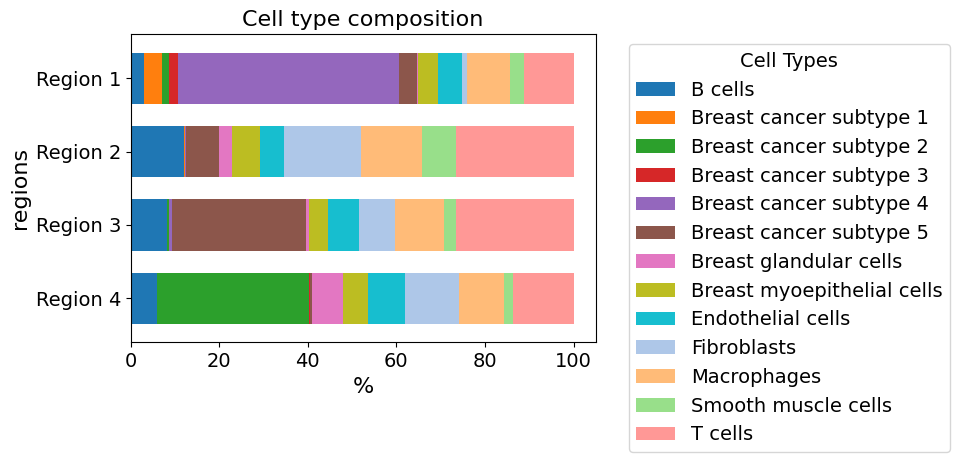

<Figure size 640x480 with 0 Axes>

In [12]:
plot_cellular_composition(
    data=xd, cell_type_col="cell_type_dc_sub",
    key="Katja", modality="regions", #max_cols=3,
    show_labels=True, plot_type="barh",
    savepath="figures/cell_composition_barh_regions_Katja.pdf"
)

In [36]:
xd.save()

Updating project in C:\Users\ge37voy\.cache\InSituPy\out\demo_insitupy_project
	Updating cells...
	Updating annotations...
	Updating regions...
Saved.


## Next steps for DGE analysis

1. Subtype 1 and 3 in invasive tumor - 1 is in the center and 3 as outer budding layer. Also some individual tumor cells with subtype 3 found. What is the difference between the two subtypes?
    - DGE analysis within invasive Tumor annotation - subtype 3 vs. subtype 1


In [13]:
from insitupy import differential_gene_expression

Calculate differentially expressed genes with Scanpy's `rank_genes_groups` using 't-test'.
Saving figure to file figures/volcano_invasive_subtype3_vs_subtype1.pdf
Saved.


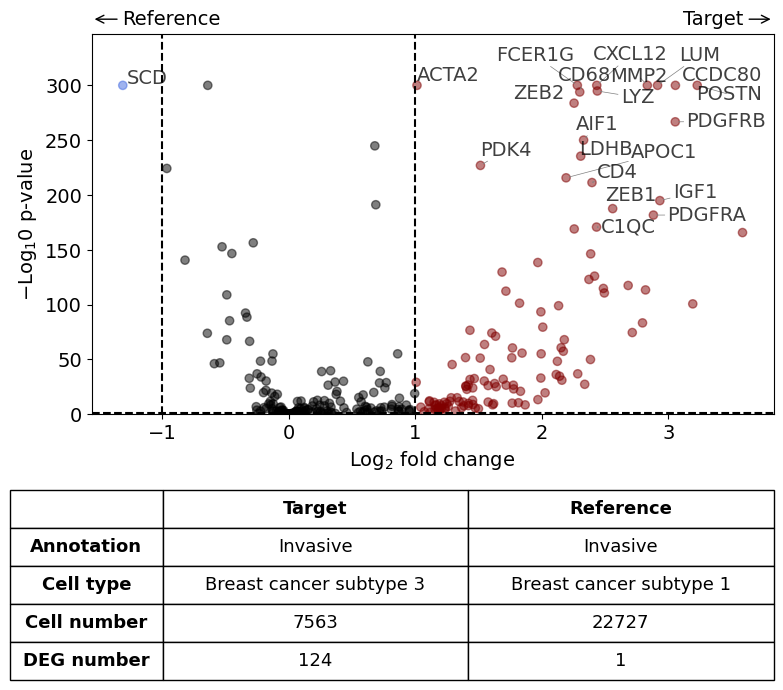

In [54]:
differential_gene_expression(
    target=xd,
    target_annotation_tuple=("Katja", "Invasive"),
    ref_annotation_tuple="same",
    target_cell_type_tuple=("cell_type_dc_sub", "Breast cancer subtype 3"),
    ref_cell_type_tuple=("cell_type_dc_sub", "Breast cancer subtype 1"),
    exclude_ambiguous_assignments=True, # in this case we are sure that there
    savepath="figures/volcano_invasive_subtype3_vs_subtype1.pdf"
)

### Comparison of DCIS vs invasive

Calculate differentially expressed genes with Scanpy's `rank_genes_groups` using 't-test'.
Saving figure to file figures/volcano_subtype4_vs_subtype1.pdf
Saved.


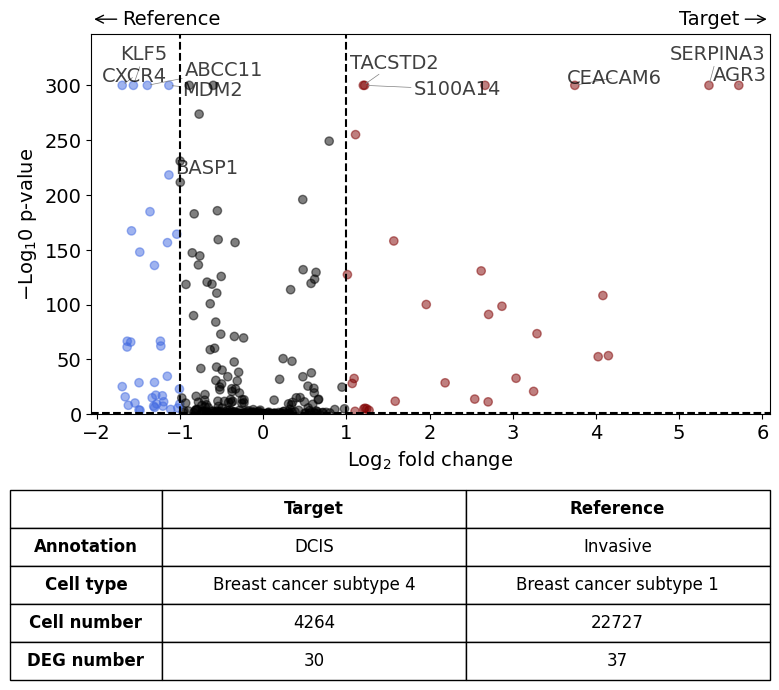

In [50]:
differential_gene_expression(
    target=xd,
    target_annotation_tuple=("Katja", "DCIS"),
    ref_annotation_tuple=("Katja", "Invasive"),
    target_cell_type_tuple=("cell_type_dc_sub", "Breast cancer subtype 4"),
    ref_cell_type_tuple=("cell_type_dc_sub", "Breast cancer subtype 1"),
    exclude_ambiguous_assignments=True, # in this case we are sure that there
    label_top_n=5,
    savepath="figures/volcano_subtype4_vs_subtype1.pdf"
)

### Comparison of DCIS vs DCIS with stromal reaction

Calculate differentially expressed genes with Scanpy's `rank_genes_groups` using 't-test'.
Saving figure to file figures/volcano_subtype4_vs_subtype5.pdf
Saved.


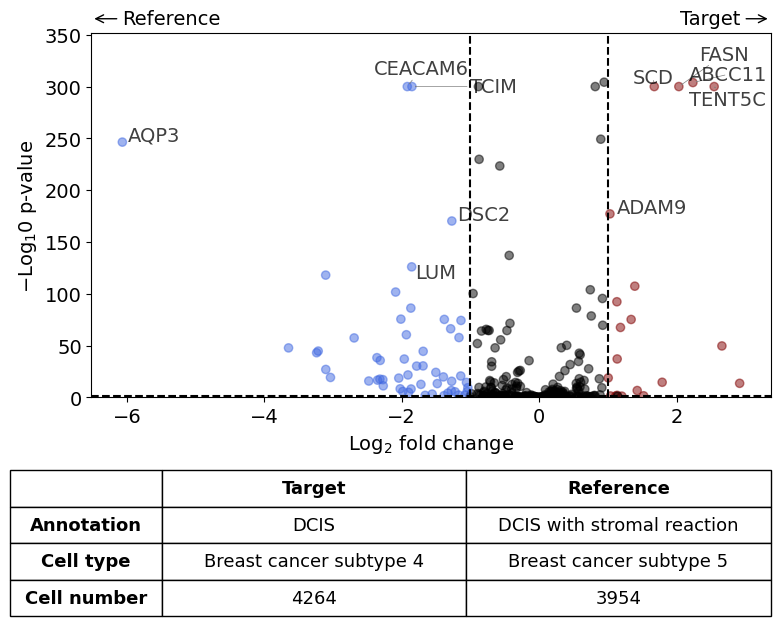

In [23]:
differential_gene_expression(
    target=xd,
    target_annotation_tuple=("Katja", "DCIS"),
    ref_annotation_tuple=("Katja", "DCIS with stromal reaction"),
    target_cell_type_tuple=("cell_type_dc_sub", "Breast cancer subtype 4"),
    ref_cell_type_tuple=("cell_type_dc_sub", "Breast cancer subtype 5"),
    exclude_ambiguous_assignments=True, # in this case we are sure that there
    label_top_n=5,
    savepath="figures/volcano_subtype4_vs_subtype5.pdf"
)

## AQP3 expression higher in subtype 5 DCIS in Region 3 compared to subtype 5 DCIS in Region 2.

Calculate differentially expressed genes with Scanpy's `rank_genes_groups` using 't-test'.
Saving figure to file figures/volcano_stromalDCIS_region3_vs_region2.pdf
Saved.


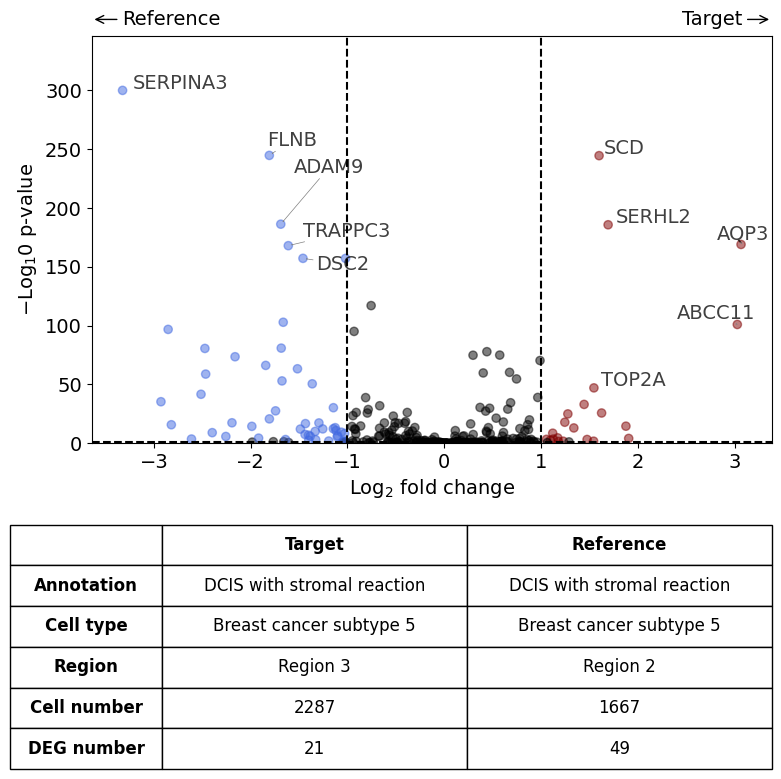

In [53]:
differential_gene_expression(
    target=xd,
    target_annotation_tuple=("Katja", "DCIS with stromal reaction"),
    ref_annotation_tuple=("Katja", "DCIS with stromal reaction"),
    target_cell_type_tuple=("cell_type_dc_sub", "Breast cancer subtype 5"),
    ref_cell_type_tuple="same",
    target_region_tuple=("Katja", "Region 3"),
    ref_region_tuple=("Katja", "Region 2"),
    exclude_ambiguous_assignments=True, # in this case we are sure that there
    label_top_n=5,
    savepath="figures/volcano_stromalDCIS_region3_vs_region2.pdf"
)

Calculate differentially expressed genes with Scanpy's `rank_genes_groups` using 't-test'.
Saving figure to file figures/volcano_stromalDCIS_region3_vs_region2.pdf
Saved.


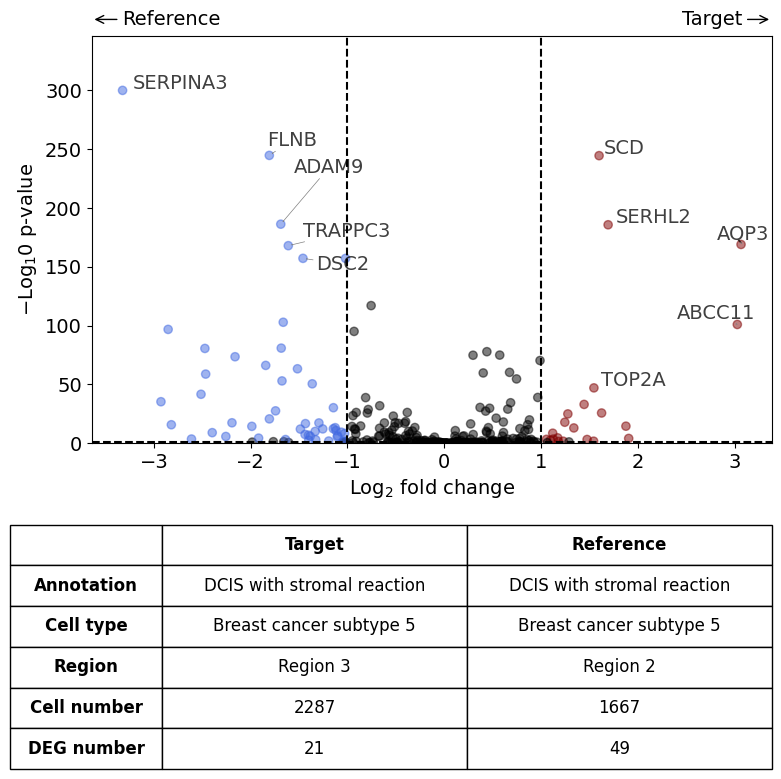

In [55]:
results = differential_gene_expression(
    target=xd,
    target_annotation_tuple=("Katja", "DCIS with stromal reaction"),
    ref_annotation_tuple=("Katja", "DCIS with stromal reaction"),
    target_cell_type_tuple=("cell_type_dc_sub", "Breast cancer subtype 5"),
    ref_cell_type_tuple="same",
    target_region_tuple=("Katja", "Region 3"),
    ref_region_tuple=("Katja", "Region 2"),
    exclude_ambiguous_assignments=True, # in this case we are sure that there
    label_top_n=5,
    return_results=True,
    savepath="figures/volcano_stromalDCIS_region3_vs_region2.pdf"
)

## GO term enrichment analysis

In [60]:
from insitupy.utils.go import GOEnrichment, get_up_down_genes

In [64]:
df = results["results"]
genes_up, genes_down = get_up_down_genes(df, pval_threshold=0.05, logfold_threshold=1)

In [65]:
genes_up

['SCD',
 'SERHL2',
 'AQP3',
 'ABCC11',
 'TOP2A',
 'CXCR4',
 'MKI67',
 'CENPF',
 'MZB1',
 'RAPGEF3',
 'CD68',
 'FCER1G',
 'HAVCR2',
 'NCAM1',
 'SOX18',
 'CCL5',
 'EGFL7',
 'SELL',
 'LY86',
 'TPSAB1',
 'RAMP2']

In [66]:
go = GOEnrichment()
go.gprofiler(target_genes=genes_up, key_added='up',
             top_n=20, organism="hsapiens", return_df=False)
go.gprofiler(target_genes=genes_down, key_added='down',
             top_n=20, organism="hsapiens", return_df=False)

In [67]:
go

GOEnrichment analyses performed:
  gprofiler:
    - up
    - down

In [68]:
enrichment = go.results["gprofiler"]["down"]
enrichment.head()

source                 native  \
query 0   KEGG             KEGG:05215   
      1  MIRNA  MIRNA:mmu-miR-200c-3p   
      2  MIRNA  MIRNA:mmu-miR-200b-3p   
      3  MIRNA  MIRNA:mmu-miR-200a-3p   
      4  GO:MF             GO:0005017   

                                                     name   p_value  \
query 0                                   Prostate cancer  0.000577   
      1                                   mmu-miR-200c-3p  0.000645   
      2                                   mmu-miR-200b-3p  0.000645   
      3                                   mmu-miR-200a-3p  0.000645   
      4  platelet-derived growth factor receptor activity  0.000669   

         significant                                        description  \
query 0         True                                    Prostate cancer   
      1         True                                    mmu-miR-200c-3p   
      2         True                                    mmu-miR-200b-3p   
      3         True                                    mmu-miR-200a-3p   
      4         True  "Combining with platelet-derived growth factor...   

         term_size  query_size  intersection_size  effective_domain_size  \
query 0         97          13                  4                   8484   
      1          2          18                  2                  14822   
      2          2          18                  2                  14822   
      3          2          18                  2                  14822   
      4          3          19                  2                  20196   

         precision  Gene ratio    query         parents  \
query 0   0.307692    0.041237  query_1    [KEGG:00000]   
      1   0.111111    1.000000  query_1  [MIRNA:000000]   
      2   0.111111    1.000000  query_1  [MIRNA:000000]   
      3   0.111111    1.000000  query_1  [MIRNA:000000]   
      4   0.105263    0.666667  query_1    [GO:0004714]   

                        intersections  \
query 0  [TCF7, ZEB1, PDGFRB, PDGFRA]   
      1                  [ZEB1, ZEB2]   
      2                  [ZEB1, ZEB2]   
      3                  [ZEB1, ZEB2]   
      4              [PDGFRB, PDGFRA]   

                                                 evidences  Enrichment score  
query 0                   [[KEGG], [KEGG], [KEGG], [KEGG]]          3.238647  
      1                                 [[MIRNA], [MIRNA]]          3.190517  
      2                                 [[MIRNA], [MIRNA]]          3.190517  
      3                                 [[MIRNA], [MIRNA]]          3.190517  
      4  [[IDA, IMP, IBA, TAS, IEA], [IDA, IMP, IBA, IEA]]          3.174794

In [69]:
from insitupy.plotting.go import go_plot

Saving figure to file figures/go_stromalDCIS_region3_vs_region2.pdf
Saved.


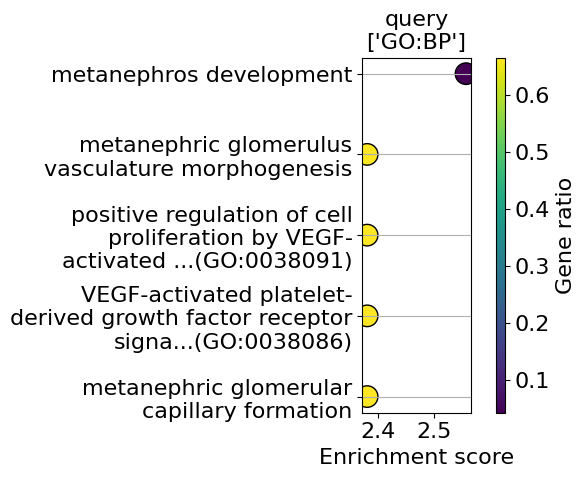

In [73]:
go_plot(enrichment=enrichment,
        style='dot',
        libraries='GO:BP',
        max_to_plot=5,
        figsize=(6,5),
        savepath="figures/go_stromalDCIS_region3_vs_region2.pdf"
        )

In [74]:
xd.show()

In [79]:
xd.save_current_colorlegend("figures/colorlegend_SERPINA3.pdf")

Figure saved as figures/colorlegend_SERPINA3.pdf


Calculate differentially expressed genes with Scanpy's `rank_genes_groups` using 't-test'.


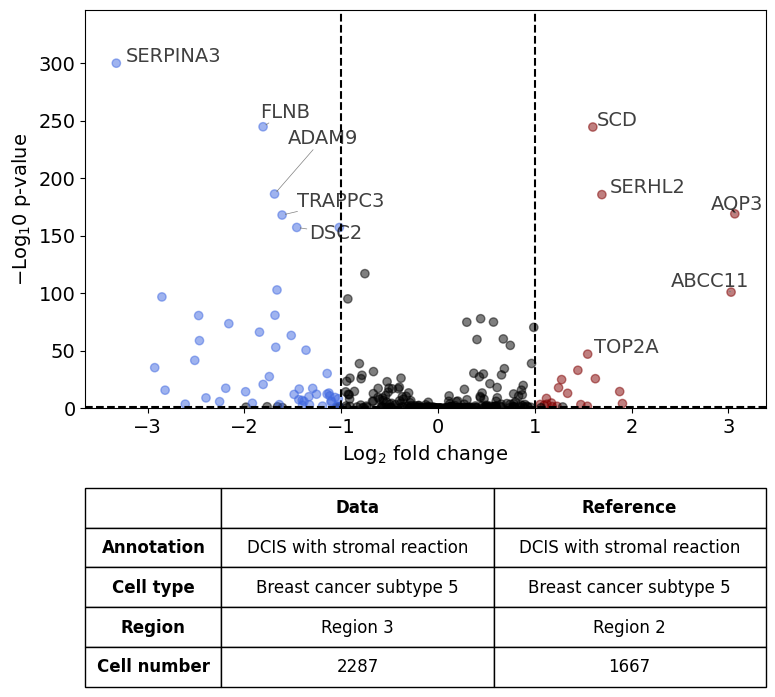

In [ ]:
differential_gene_expression(
    data=xd,
    data_annotation_tuple=("Katja", "DCIS with stromal reaction"),
    ref_annotation_tuple=("Katja", "DCIS with stromal reaction"),
    data_cell_type_tuple=("cell_type_dc_sub", "Breast cancer subtype 5"),
    ref_cell_type_tuple="same",
    data_region_tuple=("Katja", "Region 3"),
    ref_region_tuple=("Katja", "Region 2"),
    exclude_ambiguous_assignments=True, # in this case we are sure that there
    label_top_n=5,
    #savepath="figures/volcano_subtype4_vs_subtype5.pdf"
)

In [30]:
import scanpy as sc

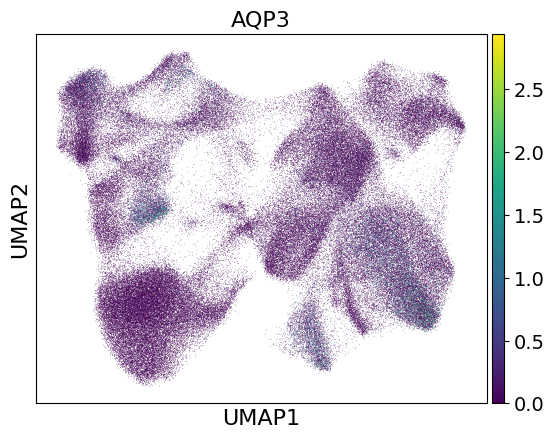

In [31]:
sc.pl.umap(xd.cells.matrix, color=["AQP3"])

In [27]:
xd.show()

In [48]:
from insitupy.plotting import plot_colorlegend

In [53]:
xd.save_current_colorlegend("figures/colorlegend_KLF5.pdf")

Figure saved as figures/colorlegend_KLF5.pdf


In [50]:
plot_colorlegend()

TypeError: plot_colorlegend() missing 1 required positional argument: 'viewer'

Calculate differentially expressed genes with Scanpy's `rank_genes_groups` using 't-test'.
Saving figure to file figures/volcano_invasive_subtype3_vs_subtype1.pdf
Saved.


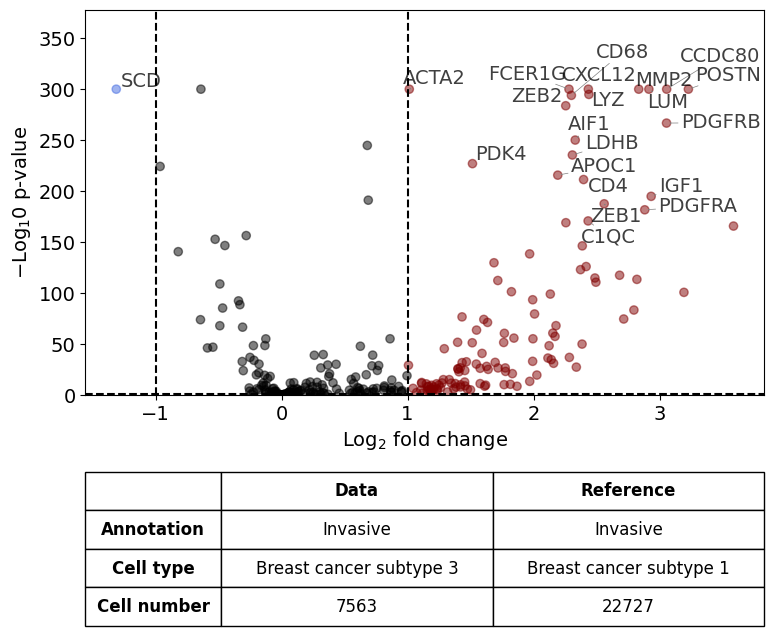

In [ ]:
differential_gene_expression(
    data=xd,
    data_annotation_tuple=("Katja", "Invasive"),
    ref_annotation_tuple="same",
    data_cell_type_tuple=("cell_type_dc_sub", "Breast cancer subtype 3"),
    ref_cell_type_tuple=("cell_type_dc_sub", "Breast cancer subtype 1"),
    exclude_ambiguous_assignments=True, # in this case we are sure that there
    savepath="figures/volcano_invasive_subtype3_vs_subtype1.pdf"
)

In [ ]:
gdf =

In [22]:
import shapely

In [27]:
intersection = shapely.intersection_all(xd.regions["Katja"]["geometry"])

In [ ]:
intersection

NotImplementedError: 

In [32]:
import geopandas as gpd

def has_overlapping_geometries(gdf):
    """
    Check if there are any overlapping geometries in a GeoPandas DataFrame.

    Parameters:
    gdf (GeoDataFrame): A GeoPandas GeoDataFrame containing geometries.

    Returns:
    bool: True if there are overlapping geometries, False otherwise.
    """
    for idx, geom in gdf.iterrows():
        # Remove the current geometry from the GeoDataFrame
        gdf_copy = gdf.drop(idx)

        # Check for overlaps
        overlaps = gdf_copy[gdf_copy.geometry.overlaps(geom.geometry)]

        if not overlaps.empty:
            return True

    return False

In [33]:
has_overlapping_geometries(gdf)

False

In [38]:
import pandas as pd

In [40]:
gdf2 = pd.concat([gdf, xd.annotations["Katja"]])

In [41]:
has_overlapping_geometries(gdf2)

True

<Axes: >

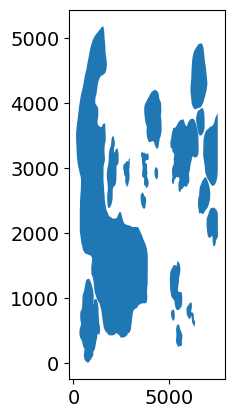

In [30]:
xd.annotations["Katja"].plot()

<Axes: >

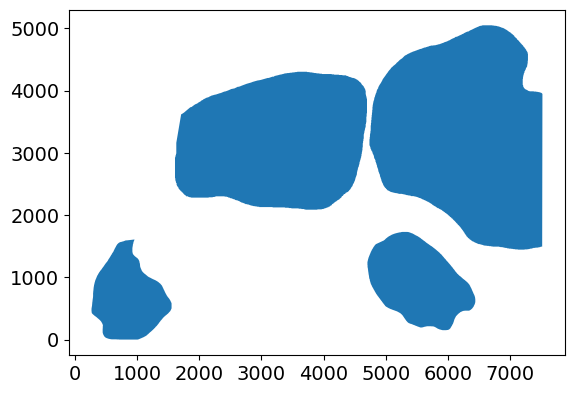

In [28]:
gdf.plot()

In [ ]:
intersection = shapely.intersection_all(xd.regions["Katja"]["geometry"])

In [27]:
xd.show()

In [51]:
p = xd.regions["Katja"]["geometry"][1]

In [52]:
import numpy as np

In [ ]:
exterior_array = np.array([p.exterior.coords.xy[1].tolist()[:-1],
                        p.exterior.coords.xy[0].tolist()[:-1]]).T

In [55]:
exterior_array = np.array([p.exterior.coords.xy[1].tolist(),
                        p.exterior.coords.xy[0].tolist()]).T

In [57]:
exterior_array.tolist()

[[1444.3625, 7132.775],
 [1448.3999999999999, 7120.875],
 [1448.3999999999999, 7088.575],
 [1452.4375, 7076.675],
 [1452.4375, 7056.4875],
 [1456.475, 7048.412499999999],
 [1456.475, 7028.4375],
 [1460.3, 7016.325],
 [1460.3, 6988.275],
 [1464.3374999999999, 6980.2],
 [1464.3374999999999, 6960.224999999999],
 [1468.375, 6956.1875],
 [1468.375, 6952.15],
 [1472.4125, 6944.075],
 [1472.4125, 6924.099999999999],
 [1476.45, 6911.9875],
 [1476.45, 6903.912499999999],
 [1480.4875, 6895.8375],
 [1480.4875, 6883.724999999999],
 [1484.5249999999999, 6879.9],
 [1484.5249999999999, 6847.599999999999],
 [1488.5625, 6843.5625],
 [1488.5625, 6827.625],
 [1492.6, 6823.5875],
 [1492.6, 6723.075],
 [1496.6375, 6715.2125],
 [1496.6375, 6695.025],
 [1500.4624999999999, 6690.9875],
 [1500.4624999999999, 6662.9375],
 [1504.5, 6658.9],
 [1504.5, 6626.8125],
 [1508.5375, 6622.775],
 [1508.5375, 6590.6875],
 [1512.575, 6586.65],
 [1512.575, 6574.537499999999],
 [1516.6125, 6570.5],
 [1516.6125, 6566.4625],
 [

In [54]:
exterior_array

array([[1444.3625, 7132.775 ],
       [1448.4   , 7120.875 ],
       [1448.4   , 7088.575 ],
       ...,
       [1448.4   , 7281.525 ],
       [1448.4   , 7241.3625],
       [1444.3625, 7229.25  ]])

In [60]:
xd.show()

Assigning key 'Katja'...
Added results to `.cells.matrix.obsm['regions']


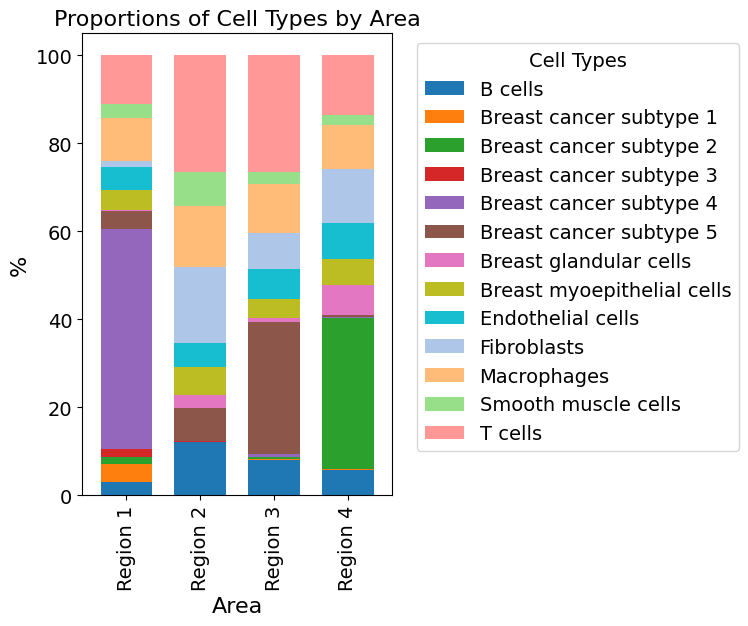

<Figure size 640x480 with 0 Axes>

In [25]:
plot_cellular_composition(
    data=xd, cell_type_col="cell_type_dc_sub",
    key="Katja", modality="regions", #max_cols=3,
    show_labels=True, plot_type="bar",
    #savepath="figures/cell_composition_regions_Demo_Katja.pdf"
)

## Perform sample-level differential gene expression analysis using `InSituData`

In [11]:
from insitupy import differential_gene_expression

### Scenario 1: Comparison of two annotations within one dataset

Annotations with key 'Demo' have already been assigned to the dataset.
Calculate differentially expressed genes with Scanpy's `rank_genes_groups` using 't-test'.
0 [-0.67331788 -0.19274296]
1 [ 0.28305876 -0.44882024]


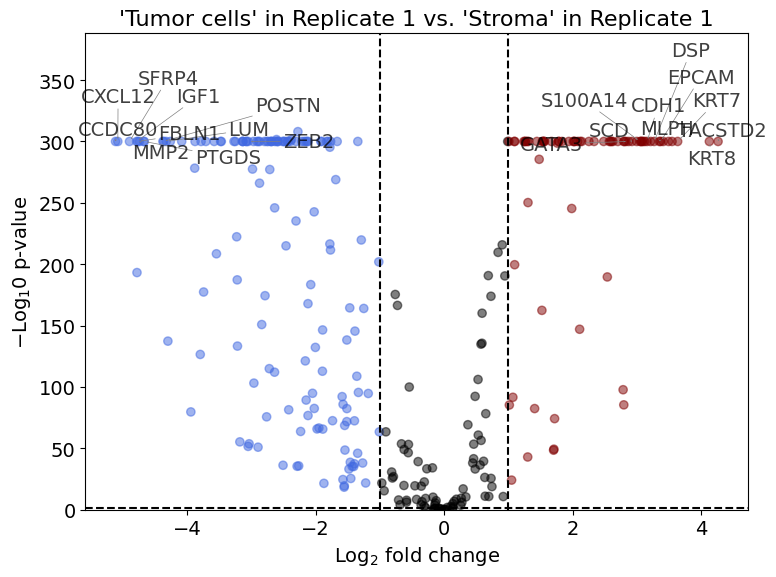

In [12]:
differential_gene_expression(
    data=xd,
    data_annotation_tuple=("Demo", "Tumor cells"),
    ref_annotation_tuple=("Demo", "Stroma"),
    ref_data=None,
    ignore_duplicate_assignments=True, # if a cell is assigned to both the annotation and the reference, it is used only for the annotation
    label_top_n=10
)

### Scenario 2: Comparison of two annotations within one dataset - restrict analysis to a specific region

Annotations with key 'Demo' have already been assigned to the dataset.
Regions with key 'Demo' have already been assigned to the dataset.
Restrict analysis to region 'Region 3' from key 'Demo'.
Calculate differentially expressed genes with Scanpy's `rank_genes_groups` using 't-test'.
11 [-0.6022815   0.66140381]
15 [ 0.26359131 -0.40731064]


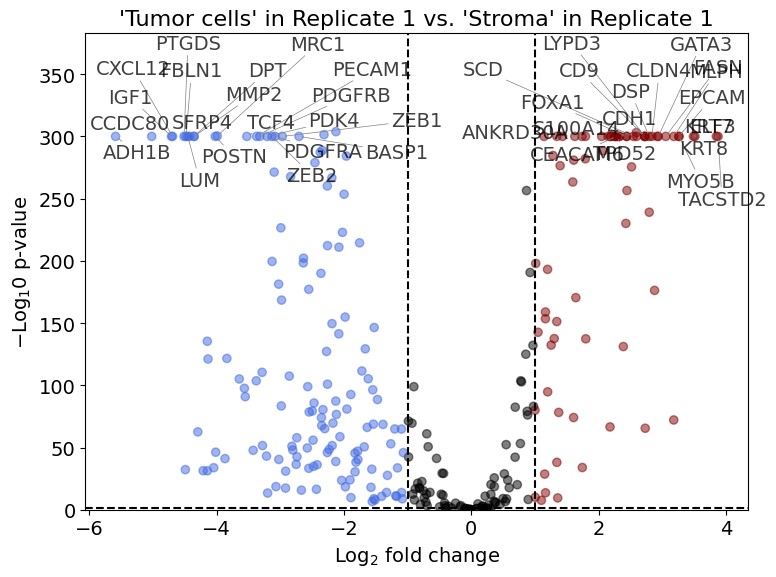

In [13]:
differential_gene_expression(
    data=xd,
    data_annotation_tuple=("Demo", "Tumor cells"),
    ref_annotation_tuple=("Demo", "Stroma"),
    ref_data=None,
    ignore_duplicate_assignments=True, # if a cell is assigned to both the annotation and the reference, it is used only for the annotation
    region_tuple=("Demo", "Region 3"),
)

## Experiment-level differential gene expression analysis

The clear structure of `InSituExperiment` lets us easily plan complex differential gene expression analysis across multiple samples. In the following, different Scenarios are shown how this can be done.

For more information on the `InSituExperiment` object see [here](./09_InSituPy_InSituExperiment.ipynb).

### Creating `InSituExperiment` object

In a first step the region annotations are used to split the dataset and create a `InSituExperiment` object.

In [14]:
from insitupy import InSituExperiment

In [15]:
exp = InSituExperiment.from_regions(
    data=xd,
    region_key="Demo",
    region_names=None # defaults to all regions
)
exp

InSituExperiment with 3 samples:
           uid slide_id    sample_id region_key region_name
0     f7c09891  0001879  Replicate 1       Demo    Region 1
1     9b21df5f  0001879  Replicate 1       Demo    Region 2
2     ee5ade04  0001879  Replicate 1       Demo    Region 3

#### Scenario 1: Comparison of cell types between two samples

##### Scenario 1.1: Using the `InSituData` objects

First, the datasets of interest are extracted from the `InSituExperiment` object and subsequently processed using the `differential_gene_expression` function. In contrast to the previous examples we use now two different datasets.

In [16]:
xd0 = exp.data[0]
xd1 = exp.data[1]
xd2 = exp.data[2]

In [17]:
exp

InSituExperiment with 3 samples:
           uid slide_id    sample_id region_key region_name
0     f7c09891  0001879  Replicate 1       Demo    Region 1
1     9b21df5f  0001879  Replicate 1       Demo    Region 2
2     ee5ade04  0001879  Replicate 1       Demo    Region 3

##### With one reference dataset

c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\site-packages\anndata\_core\anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\site-packages\anndata\_core\anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Calculate differentially expressed genes with Scanpy's `rank_genes_groups` using 't-test'.


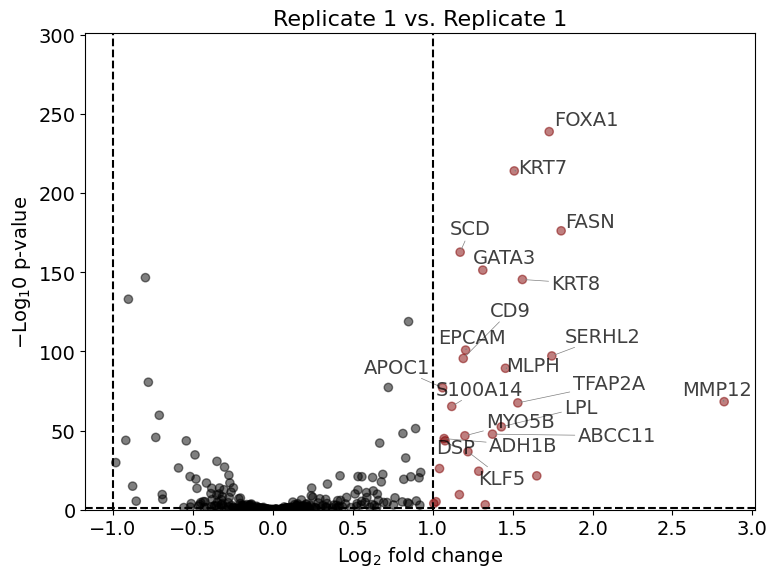

In [ ]:
differential_gene_expression(
    data=xd,
    ref_data=xd1,
    cell_type_tuple=("cell_type_dc_sub", "Macrophages"),
    ignore_duplicate_assignments=True, # if a cell is assigned to both the annotation and the reference, it is used only for the annotation,

)

##### With list of reference datasets

c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\site-packages\anndata\_core\anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\site-packages\anndata\_core\anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Calculate differentially expressed genes with Scanpy's `rank_genes_groups` using 't-test'.


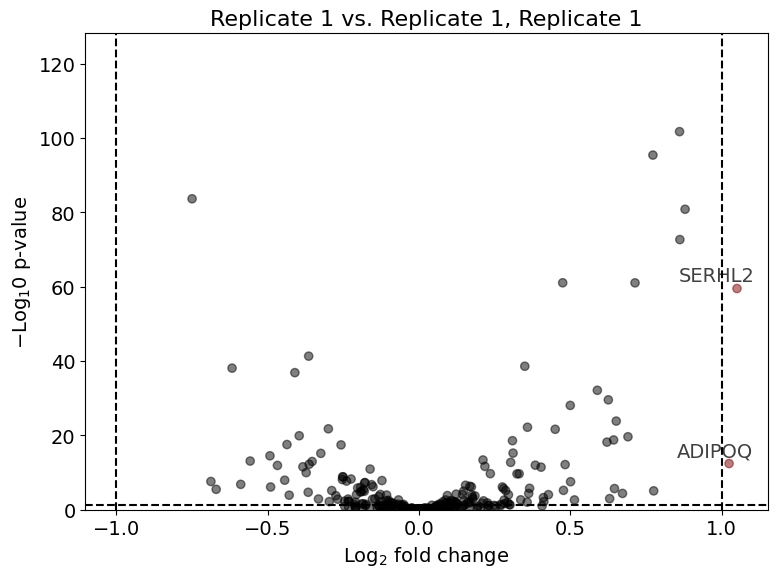

In [ ]:
differential_gene_expression(
    data=xd,
    ref_data=[xd1, xd2],
    cell_type_tuple=("cell_type_dc_sub", "Macrophages"),
    ignore_duplicate_assignments=True, # if a cell is assigned to both the annotation and the reference, it is used only for the annotation
)

##### Scenario 1.2: Using the `InSituExperiment` objects

Instead of extracting the `InSituData` objects first, we can also perform the DGE analysis directly on the `InSituExperiment` object using its `dge()` function.

##### With one reference dataset

Calculate differentially expressed genes with Scanpy's `rank_genes_groups` using 't-test'.


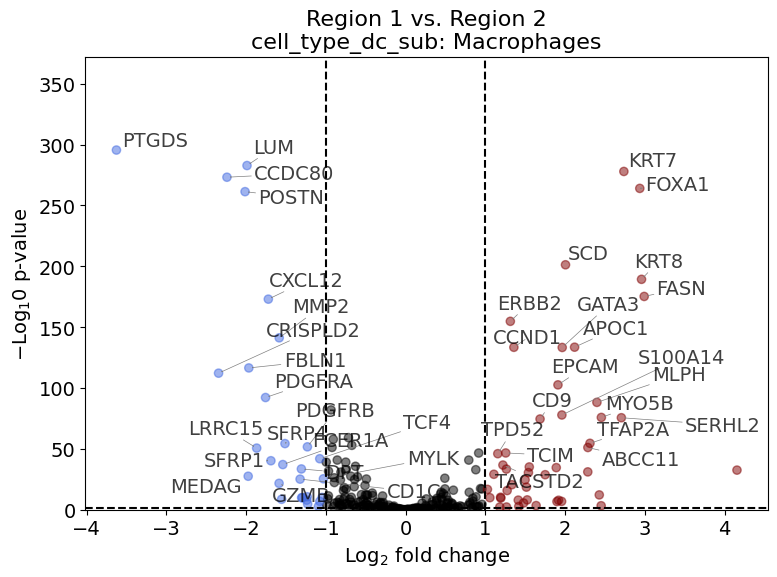

In [ ]:
exp.dge(
    target_id=0,
    ref_id=1,
    cell_type_tuple=("cell_type_dc_sub", "Macrophages"),
    ignore_duplicate_assignments=True,
    name_col="region_name"
)

##### With list of reference datasets

Calculate differentially expressed genes with Scanpy's `rank_genes_groups` using 't-test'.


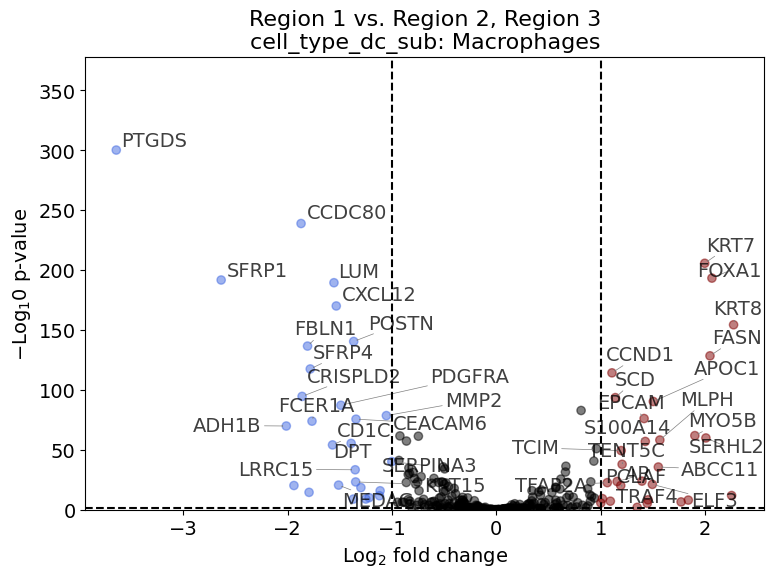

In [ ]:
exp.dge(
    target_id=0,
    ref_id=[1,2],
    cell_type_tuple=("cell_type_dc_sub", "Macrophages"),
    ignore_duplicate_assignments=True,
    name_col="region_name"
)

##### Against all other datasets as reference using `"rest"` argument

This should result in the same plot than the previous analysis

Calculate differentially expressed genes with Scanpy's `rank_genes_groups` using 't-test'.
Saving figure to file figures/dge_demo_region1_vs_rest.pdf
Saved.


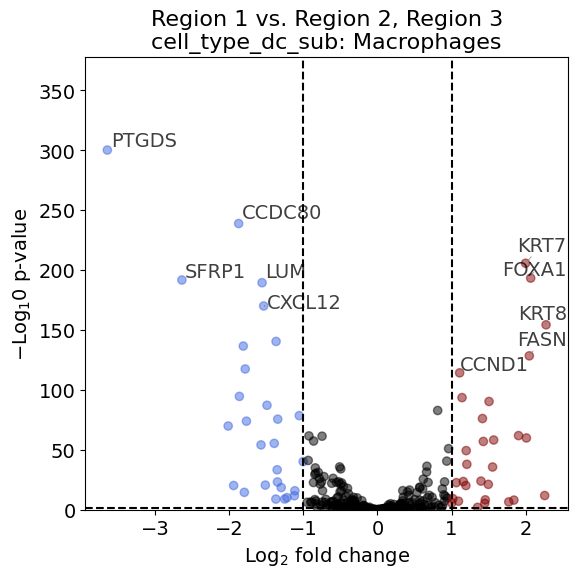

In [ ]:
exp.dge(
    target_id=0,
    ref_id="rest",
    cell_type_tuple=("cell_type_dc_sub", "Macrophages"),
    ignore_duplicate_assignments=True,
    name_col="region_name",
    figsize=(6,6),
    label_top_n=5,
    savepath="figures/dge_demo_region1_vs_rest.pdf"
)

Calculate differentially expressed genes with Scanpy's `rank_genes_groups` using 't-test'.
Saving figure to file figures/dge_demo_region2_vs_rest.pdf
Saved.


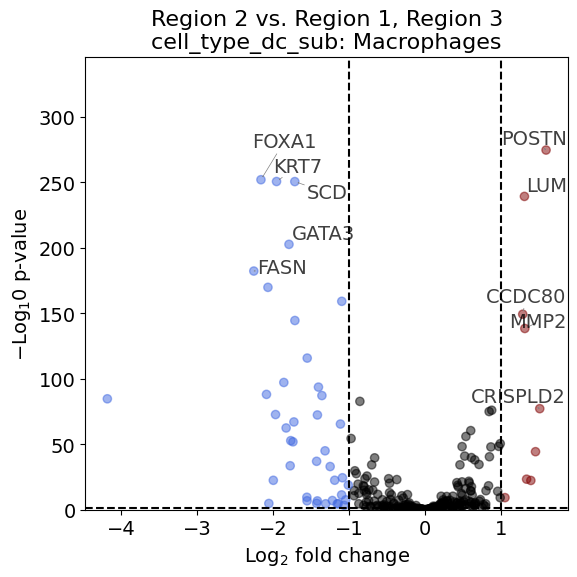

In [ ]:
exp.dge(
    target_id=1,
    ref_id="rest",
    cell_type_tuple=("cell_type_dc_sub", "Macrophages"),
    ignore_duplicate_assignments=True,
    name_col="region_name",
    figsize=(6,6),
    label_top_n=5,
    savepath="figures/dge_demo_region2_vs_rest.pdf"
)

Calculate differentially expressed genes with Scanpy's `rank_genes_groups` using 't-test'.
Saving figure to file figures/dge_demo_region3_vs_rest.pdf
Saved.


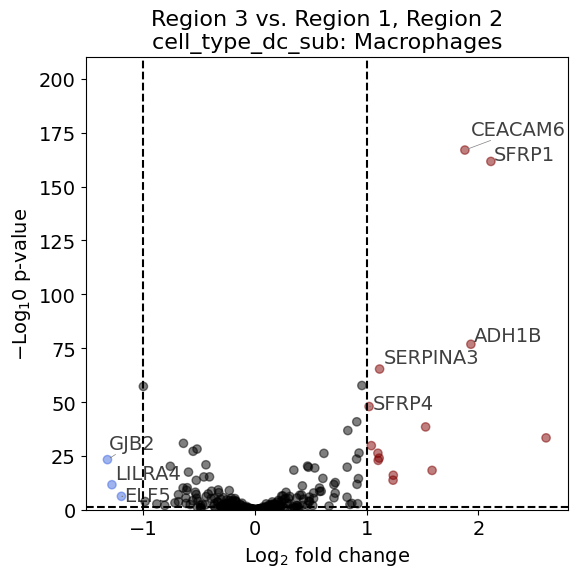

In [ ]:
exp.dge(
    target_id=2,
    ref_id="rest",
    cell_type_tuple=("cell_type_dc_sub", "Macrophages"),
    ignore_duplicate_assignments=True,
    name_col="region_name",
    figsize=(6,6),
    label_top_n=5,
    savepath="figures/dge_demo_region3_vs_rest.pdf"
)

#### Scenario 2: Comparison of cells within one annotation against all other cells - all within the same dataset

##### Scenario 2.1: Perform analysis taking all cell types together

This scenario is only uses one dataset but also works on the `InSituExperiment` level. The `name_col` argument can be used to specify which column of the metadata should be used for generating the title.

Annotations with key 'Demo' have already been assigned to the dataset.
Calculate differentially expressed genes with Scanpy's `rank_genes_groups` using 't-test'.


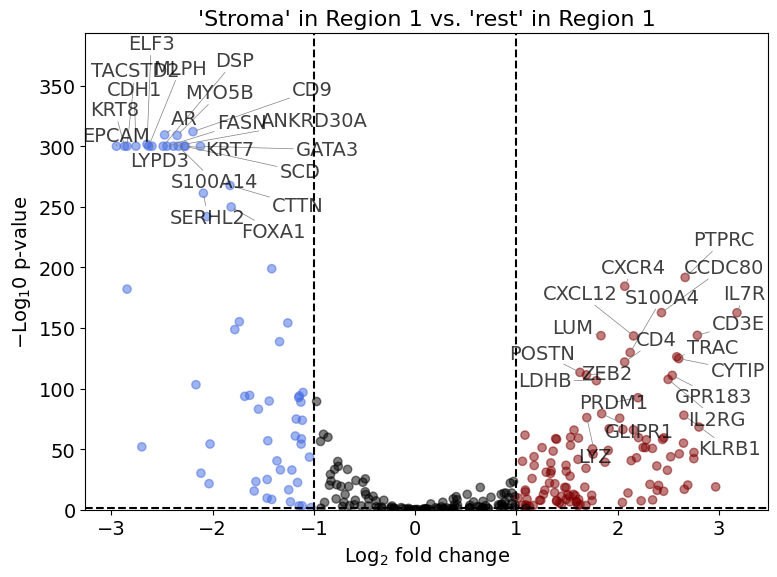

In [ ]:
exp.dge(
    target_id=0,
    target_annotation_tuple=("Demo", "Stroma"),
    ref_annotation_tuple="rest",
    name_col="region_name",
)

#### Scenario 2: Comparison of cells within one annotation against all other cells - all within the same dataset but restricted to one cell type

##### Scenario 2.1: Perform analysis for one cell type only

This scenario is very similar to the first but the analysis is restricted to only one cell type (in this case Fibroblasts).

Annotations with key 'Demo' have already been assigned to the dataset.
Calculate differentially expressed genes with Scanpy's `rank_genes_groups` using 't-test'.


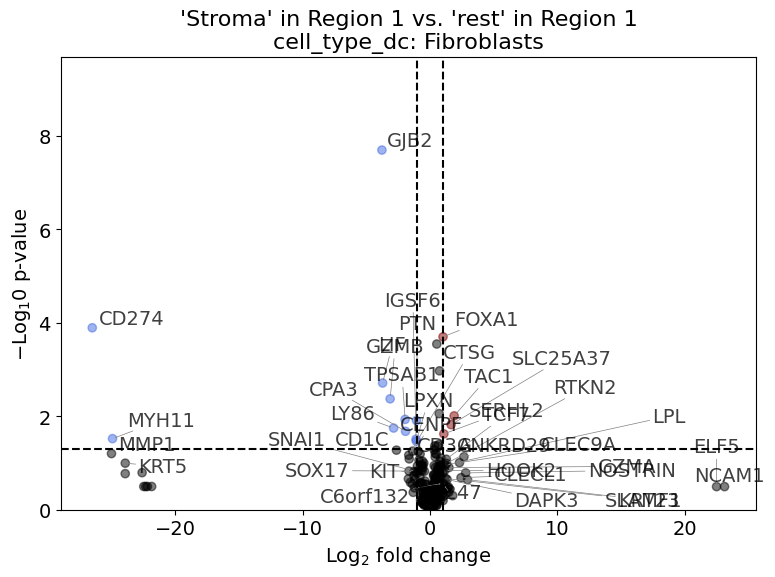

In [ ]:
exp.dge(
    target_id=0,
    target_annotation_tuple=("Demo", "Stroma"),
    ref_annotation_tuple="rest",
    cell_type_tuple=("cell_type_dc", "Fibroblasts"),
    name_col="region_name",
)

#### Scenario 3: Comparison of two annotations between two regions or datasets - restrict analysis to one cell type

Here we compare the gene expression of one particular cell type (fibroblasts) in one histological annotation (Stroma) between two datasets. Further, we save the plot as PDF and restrict the number of labelled genes to 5.

Annotations with key 'Demo' have already been assigned to the dataset.
Annotations with key 'Demo' have already been assigned to the dataset.
Calculate differentially expressed genes with Scanpy's `rank_genes_groups` using 't-test'.
Saving figure to file figures/volcano_demo.pdf
Saved.


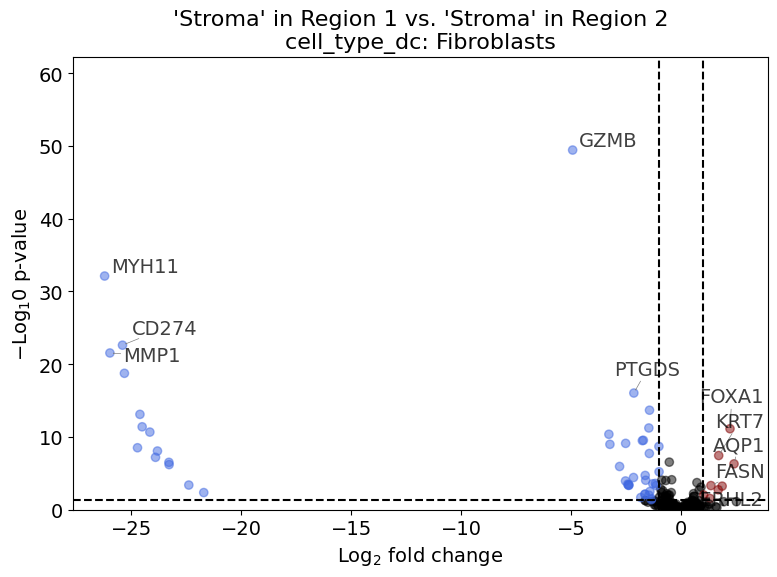

In [ ]:
annotation = "Stroma"
cell_type = "Fibroblasts"

exp.dge(
    target_id=0,
    ref_id=1,
    target_annotation_tuple=("Demo", annotation),
    ref_annotation_tuple=("Demo", annotation),
    cell_type_tuple=("cell_type_dc", cell_type),
    name_col="region_name",
    label_top_n = 5,
    savepath="figures/volcano_demo.pdf"
)

#### Scenario 4: Return results instead of Volcano plot

In [ ]:
dge = exp.dge(
    target_id=0,
    ref_id=1,
    target_annotation_tuple=("Demo", annotation),
    ref_annotation_tuple=("Demo", annotation),
    cell_type_tuple=("cell_type_tacco", cell_type),
    plot_volcano=False
)

Annotations with key 'Demo' have already been assigned to the dataset.
Annotations with key 'Demo' have already been assigned to the dataset.
Calculate differentially expressed genes with Scanpy's `rank_genes_groups` using 't-test'.


In [44]:
dge.keys()

dict_keys(['results', 'params'])

In [45]:
dge_results = dge['results']

In [46]:
dge['params']

{'groupby': 'combined_annotation_column',
 'reference': '2-Stroma',
 'method': 't-test',
 'use_raw': False,
 'layer': None,
 'corr_method': 'benjamini-hochberg'}

## GO term enrichment analysis

Gene ontology (GO) term enrichment analysis can be performed via three different analysis platforms: [STRINGdb](https://string-db.org/), [g:Profiler](https://biit.cs.ut.ee/gprofiler/gost), and [Enrichr](https://maayanlab.cloud/Enrichr/).

In [56]:
from insitupy.utils.go import GOEnrichment, get_up_down_genes
from insitupy.plotting.go import go_plot

In [58]:
genes_up, genes_down = get_up_down_genes(dge_results, pval_threshold=0.05, logfold_threshold=1)

In [59]:
# setup go term enrichment class
go = GOEnrichment()

# run go term enrichment analysis for up-regulated genes
go.stringdb(target_genes=genes_up, key_added='up',
             top_n=20, organism="hsapiens", return_df=False
             )
go.gprofiler(target_genes=genes_up, key_added='up',
             top_n=20, organism="hsapiens", return_df=False
             )
go.enrichr(target_genes=genes_up, key_added='up',
             top_n=20, organism="human", return_df=False
             )

# for down-regulated genes
go.stringdb(target_genes=genes_down, key_added='down',
             top_n=20, organism="hsapiens", return_df=False
             )
go.gprofiler(target_genes=genes_down, key_added='down',
             top_n=20, organism="hsapiens", return_df=False
             )
go.enrichr(target_genes=genes_down, key_added='down',
             top_n=20, organism="human", return_df=False
             )

The results are saved in the `GOEnrichment` class and can be accessed with the respective keys.

In [50]:
go

GOEnrichment analyses performed:
  stringdb:
    - up
    - down
  gprofiler:
    - up
    - down
  enrichr:
    - up
    - down

In [51]:
enrichment = go.results["gprofiler"]["down"]
enrichment.head()

source      native                                      name  \
query 0  GO:CC  GO:0062023  collagen-containing extracellular matrix   
      1  GO:CC  GO:0031012                      extracellular matrix   
      2  GO:CC  GO:0030312          external encapsulating structure   
      3  GO:CC  GO:0005576                      extracellular region   
      4  GO:MF  GO:0019763          immunoglobulin receptor activity   

          p_value  significant  \
query 0  0.000241         True   
      1  0.001123         True   
      2  0.001134         True   
      3  0.010306         True   
      4  0.012722         True   

                                               description  term_size  \
query 0  "An extracellular matrix consisting mainly of ...        425   
      1  "A structure lying external to one or more cel...        555   
      2  "A structure that lies outside the plasma memb...        556   
      3  "The space external to the outermost structure...       4232   
      4  "Combining with the Fc region of an immunoglob...         10   

         query_size  intersection_size  effective_domain_size  precision  \
query 0          20                  6                  22115        0.3   
      1          20                  6                  22115        0.3   
      2          20                  6                  22115        0.3   
      3          20                 12                  22115        0.6   
      4          20                  2                  20196        0.1   

         Gene ratio    query                   parents  \
query 0    0.014118  query_1              [GO:0031012]   
      1    0.010811  query_1              [GO:0030312]   
      2    0.010791  query_1  [GO:0071944, GO:0110165]   
      3    0.002836  query_1              [GO:0110165]   
      4    0.200000  query_1  [GO:0004888, GO:0140375]   

                                             intersections  \
query 0         [CTSG, EGFL7, NCAM1, TPSAB1, ANGPT2, CPA3]   
      1         [CTSG, EGFL7, NCAM1, TPSAB1, ANGPT2, CPA3]   
      2         [CTSG, EGFL7, NCAM1, TPSAB1, ANGPT2, CPA3]   
      3  [DNAAF1, CTSG, EGFL7, NCAM1, TPSAB1, KRT5, ANG...   
      4                                     [FCER1A, PIGR]   

                                                 evidences  Enrichment score  
query 0         [[HDA], [HDA], [HDA], [HDA], [IBA], [HDA]]          3.617671  
      1         [[HDA], [HDA], [HDA], [HDA], [IBA], [HDA]]          2.949698  
      2         [[HDA], [HDA], [HDA], [HDA], [IBA], [HDA]]          2.945225  
      3  [[IEA], [IDA, HDA, TAS, IEA], [ISS, IBA, IEA],...          1.986905  
      4                                     [[IDA], [IDA]]          1.895452

Saving figure to file figures/go_demo.pdf
Saved.


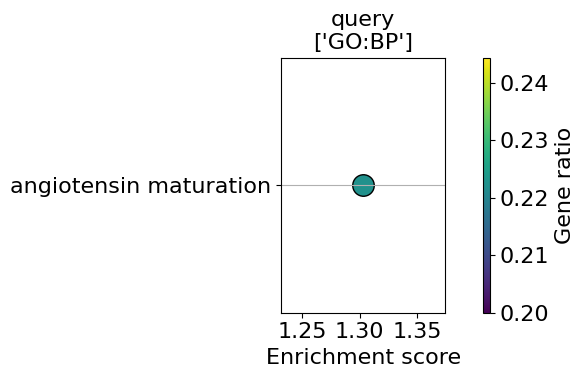

In [52]:
go_plot(enrichment=enrichment,
        style='dot',
        libraries='GO:BP',
        max_to_plot=5,
        figsize=(6,4),
        savepath="figures/go_demo.pdf")

### GO term enrichment analysis for all three regions

In [ ]:
up_list = []
down_list = []
for i in range(len(exp)):
    dge = exp.dge(
        target_id=i,
        ref_id="rest",
        cell_type_tuple=("cell_type_dc_sub", "Macrophages"),
        plot_volcano=False
    )
    genes_up, genes_down = get_up_down_genes(dge['results'], pval_threshold=0.05, logfold_threshold=1)
    up_list.append(genes_up)
    down_list.append(genes_down)

Calculate differentially expressed genes with Scanpy's `rank_genes_groups` using 't-test'.
Calculate differentially expressed genes with Scanpy's `rank_genes_groups` using 't-test'.
Calculate differentially expressed genes with Scanpy's `rank_genes_groups` using 't-test'.


In [91]:
up_list

[['KRT7',
  'FOXA1',
  'KRT8',
  'FASN',
  'CCND1',
  'SCD',
  'APOC1',
  'EPCAM',
  'MYO5B',
  'SERHL2',
  'MLPH',
  'S100A14',
  'TCIM',
  'TENT5C',
  'ABCC11',
  'AR',
  'PCLAF',
  'TFAP2A',
  'ELF3',
  'TRAF4',
  'ELF5',
  'TUBB2B',
  'DMKN',
  'STC1',
  'LILRA4',
  'ESM1',
  'C6orf132',
  'SOX17',
  'SCGB2A1'],
 ['POSTN',
  'LUM',
  'CCDC80',
  'MMP2',
  'CRISPLD2',
  'LRRC15',
  'GJB2',
  'MEDAG',
  'LTB'],
 ['CEACAM6',
  'SFRP1',
  'ADH1B',
  'SERPINA3',
  'SFRP4',
  'KRT15',
  'OPRPN',
  'AQP1',
  'SDC4',
  'CLDN4',
  'LPL',
  'KRT23',
  'MMP12',
  'MYH11']]

In [92]:
# setup go term enrichment class
go = GOEnrichment()

for i, genes_up in enumerate(up_list):
    # run go term enrichment analysis for up-regulated genes
    go.gprofiler(target_genes=genes_up, key_added=f'Region{i+1}_up',
                top_n=20, organism="hsapiens", return_df=False
                )

The results are saved in the `GOEnrichment` class and can be accessed with the respective keys.

In [93]:
go

GOEnrichment analyses performed:
  gprofiler:
    - Region1_up
    - Region2_up
    - Region3_up

Saving figure to file figures/go_demo_region1.pdf
Saved.


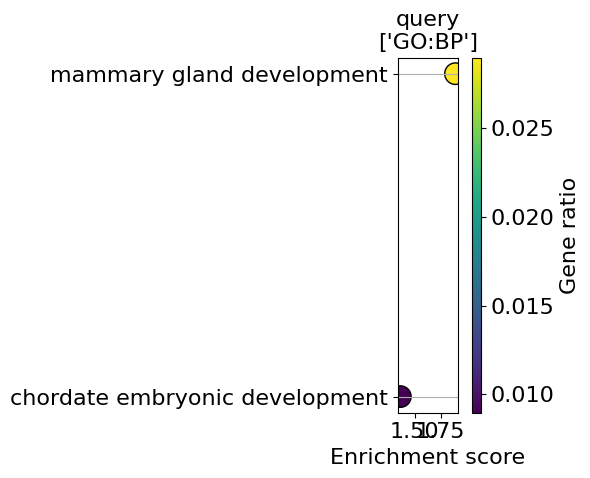

Saving figure to file figures/go_demo_region2.pdf
Saved.


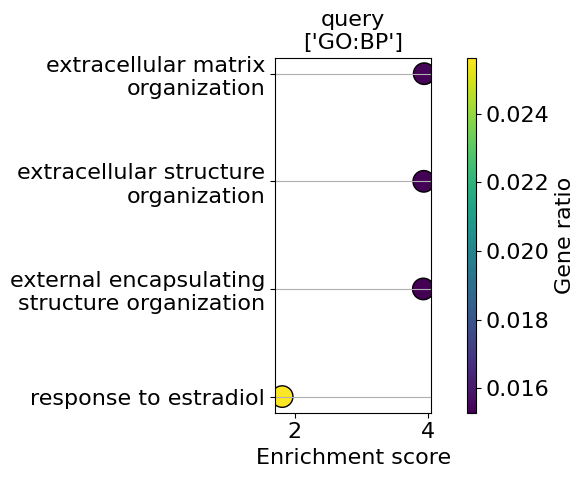

Saving figure to file figures/go_demo_region3.pdf
Saved.


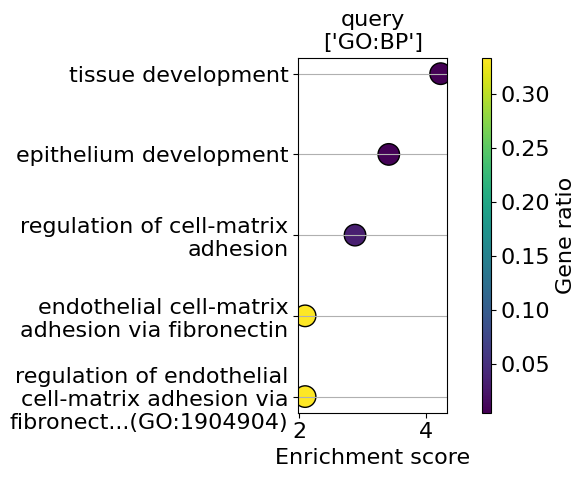

In [98]:
go_results = go.results["gprofiler"]

for i, k in enumerate(go_results.keys()):
    enrichment = go_results[k]
    go_plot(enrichment=enrichment,
            style='dot',
            libraries='GO:BP',
            max_to_plot=5,
            figsize=(6,5),
            savepath=f"figures/go_demo_region{i+1}.pdf"
            )